# Quick Messy Character Checker for Already Processed Files

### This is meant to be ran after 01 has been run and any of the following (02-04)
### Lets us overview the messy_char counts after splitting into a subset or cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from utils.constants import Paths
import numpy as np
import ast

In [2]:
# Load Excel file with existing analysis columns
# file_path = Paths.modified_metadata
file_path = Paths.mccray_1940s_subset
df = pd.read_excel(file_path)

print(f"Loaded {len(df)} rows")
print(f"Columns: {list(df.columns)}")

# Check for required columns
required_cols = ['any_messy']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Missing required columns: {missing_cols}")
    print("Run the main tracker first to generate these columns")
    exit()

Loaded 3958 rows
Columns: ['Unnamed: 0', 'Title', 'Creator', 'Contributors', 'Date', 'Approximate Date', 'Source', 'Subject', 'Local Subject', 'S.C. County', 'Description', 'Extent', 'Digital Collection', 'Website', 'Contributing Institution', 'Rights', 'Time Period', 'Geographic Location', 'Language', 'Digitization Specifications', 'Date Digital', 'Type', 'Format', 'Media Type', 'Identifier', 'Note', 'Digital Assistant', 'Transcript', 'OCLC number', 'Date created', 'Date modified', 'Reference URL', 'CONTENTdm number', 'CONTENTdm file name', 'CONTENTdm file path', 'Year', 'messy_sequences', 'messy_count', 'has_messy', 'total_messy_chars', 'special_messy_sequences', 'special_messy_count', 'has_special_messy', 'total_special_messy_chars', 'repeat_sequences', 'repeat_sequence_count', 'has_repeat_sequence', 'any_messy']


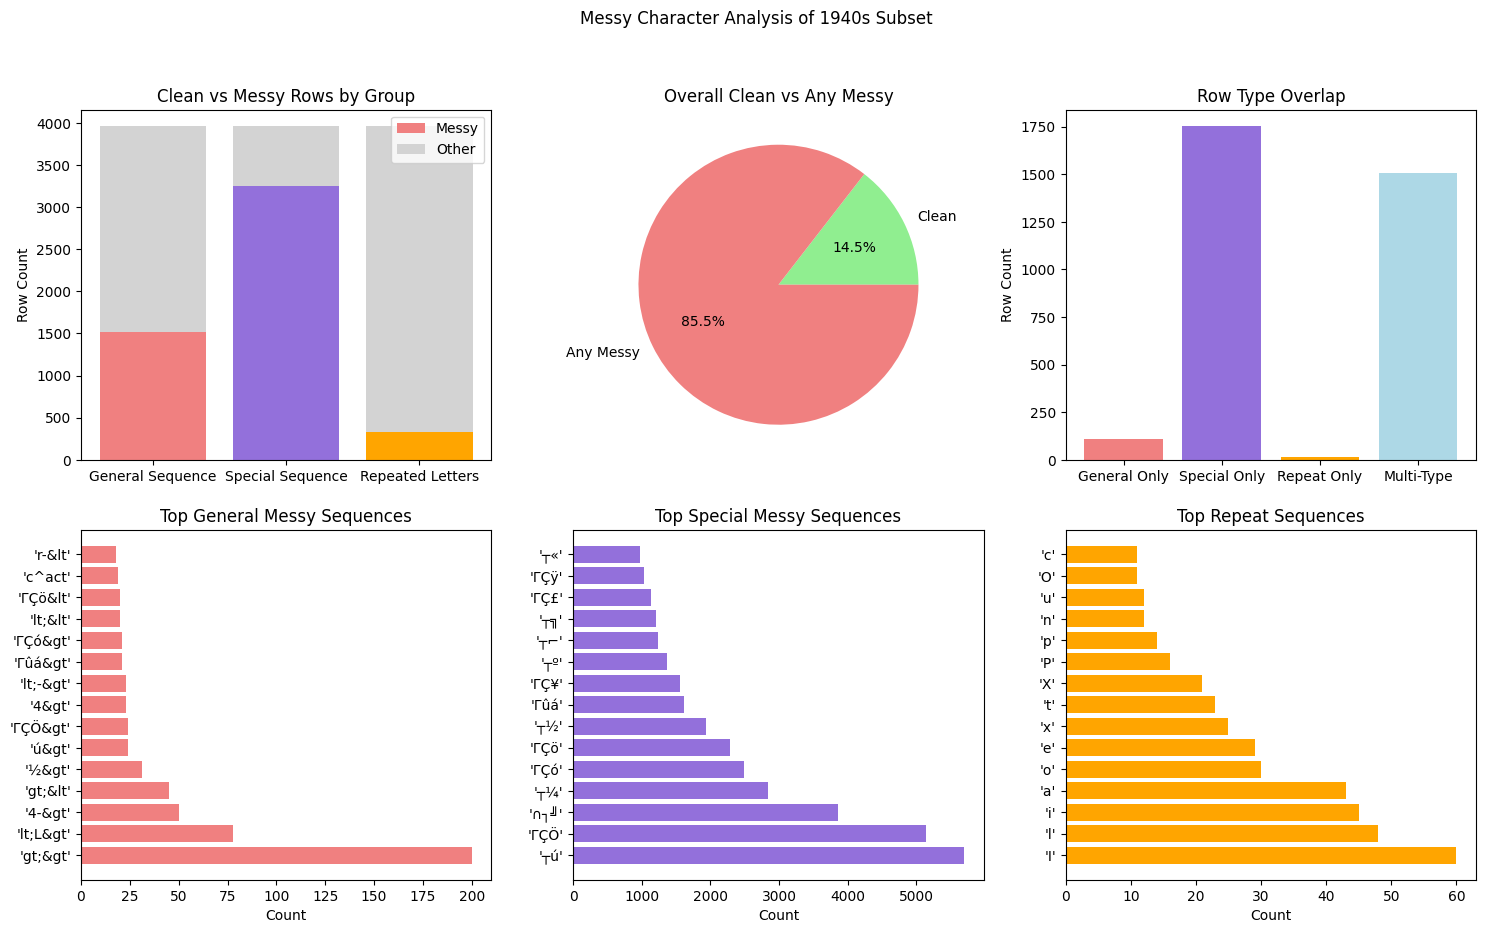

In [ ]:
# Clean vs messy for each group
group_labels = ['General Sequence', 'Special Sequence', 'Repeated Letters']
clean_counts = [
    (~df['has_messy']).sum(),
    (~df['has_special_messy']).sum(),
    (~df['has_repeat_sequence']).sum()
]
messy_counts = [
    df['has_messy'].sum(),
    df['has_special_messy'].sum(),
    df['has_repeat_sequence'].sum()
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Messy Character Analysis of 1940s Subset')

# Bar chart: clean vs messy for each group
axes[0,0].bar(group_labels, messy_counts, label='Messy', color=['lightcoral', 'mediumpurple', 'orange'])
axes[0,0].bar(group_labels, clean_counts, bottom=messy_counts, label='Other', color='lightgray')
axes[0,0].set_title('Clean vs Messy Rows by Group')
axes[0,0].set_ylabel('Row Count')
axes[0,0].legend()

# Pie chart: overall clean vs any messy
any_messy = df['any_messy'].sum()
all_rows = len(df)
axes[0,1].pie([all_rows-any_messy, any_messy], labels=['Clean', 'Any Messy'],
              autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[0,1].set_title('Overall Clean vs Any Messy')

# Stacked bar: overlap between groups
overlap_counts = [
    (df['has_messy'] & ~df['has_special_messy'] & ~df['has_repeat_sequence']).sum(),
    (~df['has_messy'] & df['has_special_messy'] & ~df['has_repeat_sequence']).sum(),
    (~df['has_messy'] & ~df['has_special_messy'] & df['has_repeat_sequence']).sum(),
    (df[['has_messy', 'has_special_messy', 'has_repeat_sequence']].sum(axis=1) > 1).sum()
]
axes[0,2].bar(['General Only', 'Special Only', 'Repeat Only', 'Multi-Type'], overlap_counts,
              color=['lightcoral', 'mediumpurple', 'orange', 'lightblue'])
axes[0,2].set_title('Row Type Overlap')
axes[0,2].set_ylabel('Row Count')

# Bar graphs for messy sequence counts
def plot_top_sequences(ax, df, column, color, title, xlabel='Count', top_n=15):
    all_sequences = []
    for sequences in df[column]:
        all_sequences.extend(sequences)
    if all_sequences:
        sequence_counts = Counter(all_sequences)
        top_items = sequence_counts.most_common(top_n)
        seqs, counts = zip(*top_items)
        seqs = [repr(s)[:15] for s in seqs]
        ax.barh(range(len(seqs)), counts, color=color)
        ax.set_yticks(range(len(seqs)))
        ax.set_yticklabels(seqs)
        ax.set_xlabel(xlabel)
        ax.set_title(title)
    else:
        ax.set_title(f'No {title}')

df['messy_sequences'] = df['messy_sequences'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['special_messy_sequences'] = df['special_messy_sequences'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['repeat_sequences'] = df['repeat_sequences'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


plot_top_sequences(
    axes[1,0], df, 'messy_sequences', 'lightcoral', 'Top General Messy Sequences'
)
plot_top_sequences(
    axes[1,1], df, 'special_messy_sequences', 'mediumpurple', 'Top Special Messy Sequences'
)
plot_top_sequences(
    axes[1,2], df, 'repeat_sequences', 'orange', 'Top Repeat Sequences'
)


In [7]:
print(df['messy_sequences'].head(50))

0     [i&S&lt;Z&rJk, El|ie, d^t'i-ttftco, 7^H^v-^^*^...
1     [J^AAyuAJ, C$UZ^lt?terV, fcul^d, kjp^v1, 3&ia,...
2     [1^7, lpJ&gt, Ct^UL, S&lt;?&CX, lt;Z&?┬ú&lt;C&...
3     [2)&u?vi, G&rmfrvu^fo&gt;7c6, fiA^t, a^a, 2duM...
4     [Clx^ilwterv, U^M, e^oJr, lt;%ZPv&gt, 4/^/1, l...
5                    [lt;{&lt, qax&gt, cr^cU, n^-GcxxP]
6     [Jy^U^xyMJSLs, Q-iA^(yr\y7ou^j, OiL^n, tf&lt;/...
7                                                    []
8                                                    []
9                                                    []
10                                                   []
11                                            [lt;f&gt]
12                                                   []
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17                                              